### Name: Elan van Biljon


#### Student Number: 18384439

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from utils import plot_confusion_matrix
from utils import nearest_feature as nf

from mnist import load_dataset
from ipywidgets import interact

### Generate training data

**MARKS 1**

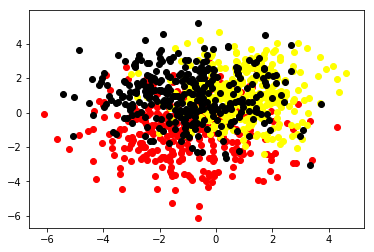

In [3]:
# Training data - two randomly-generated
# Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1], ])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

# Transpose the data so that it is easier
# to feed into library funcitons
X = X.T

# Plot the data
plt.figure()
for label, color in zip([0, 1, 2], ['red', 'yellow', 'black']):
    plt.scatter(X[label == y, 0], X[label == y, 1], color=color)
plt.show()

### Fit the training data to the scikit-learn logistic regression classifier

**MARKS 1**<br>
I worked extensively from the example that can be found at this url:<br>
http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

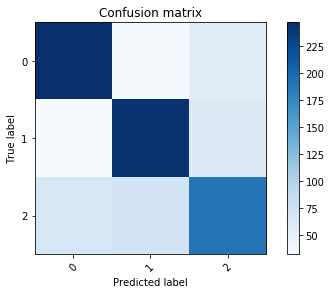

In [4]:
# Train the classisfier
classifier = logis(C=X.size,
                   solver='lbfgs',
                   multi_class='multinomial')
classifier.fit(X, y);

# Re-classify the data using the trained model 
pr_labels = classifier.predict(X)

# Use a confusion matrix to give a sense of our model's accuracy
cm = confusion_matrix(y, pr_labels)

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(
    cm,
    target_names=np.array(np.arange(0, 3), dtype='<U10')
)

### Now plot the different classes as predicted by your system: 

**MARKS 1 **

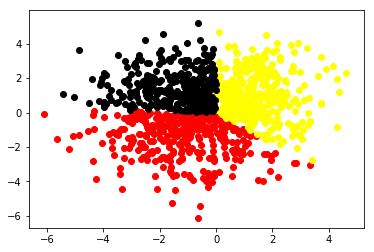

In [5]:
colors = ['red', 'yellow', 'black']
# Plot the re-classified data
plt.figure()
for label, color in zip([0, 1, 2], colors):
    plt.scatter(X[label == pr_labels, 0],
                X[label == pr_labels, 1],
                color=color)
plt.show()

**Can you tell from the graph that this is a *linear* classifier?**<br>
Yes, it is quite clear that this is a linear classifier as there are straight lines (or linear decision boundaries) between each of the classes.<br>
It is easier to see if we plot the mesh showing the class zones:

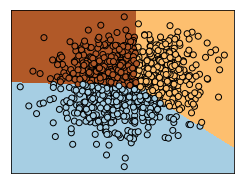

In [6]:
# Create the mesh of class regions (used to display decision boundry)
step_size = 0.01
# Find the dimensions of the required mesh
# (with small offset for better visualization)
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5
# Create the mesh
x_axis = np.arange(x_min, x_max, step_size)
y_axis = np.arange(y_min, y_max, step_size)
x_axies, y_axies = np.meshgrid(x_axis, y_axis)

# Use the model to predict what
# class each point on the mesh is
Z = classifier.predict(np.c_[x_axies.ravel(), y_axies.ravel()])
Z = Z.reshape(y_axies.shape)

# Plot the class seperation on a color map
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(x_axies, y_axies, Z, cmap=plt.cm.Paired)

# Plot the training data too
plt.scatter(X[:, 0], X[:, 1],
            c=pr_labels, edgecolors='k',
            cmap=plt.cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Now classify the MNIST digits



In [7]:
# Import the MNIST data
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

### Train the softmax classifier

**MARKS 2**

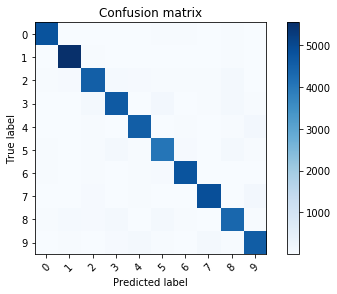

In [8]:
# Reshape the data so that it can be fed into the classifier
X_shape = X_train.shape
X_train = X_train.reshape((X_shape[0], -1))

# Train the classisfier
classifier = logis(C=X_shape[0],
                   solver='lbfgs',
                   multi_class='multinomial')
classifier.fit(X_train, y_train);

# classify the data and print the confusion matrix
pr_labels = classifier.predict(X_train)
cm = confusion_matrix(y_train, pr_labels)
plt.figure()
plot_confusion_matrix(
    cm,
    target_names=np.array(np.arange(10),
                          dtype='<U10'))

### Accuracy

**MARKS: 1**

In [9]:
X_test = X_test.reshape((X_test.shape[0], -1))
pr_labels_test = classifier.predict(X_test)
total = np.sum(pr_labels_test == y_test)
print('Accuracy: ', total/X_test.shape[0])

Accuracy:  0.9248


### Extracting the weights and displaying as images.

**MARKS 2**

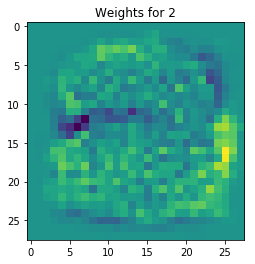

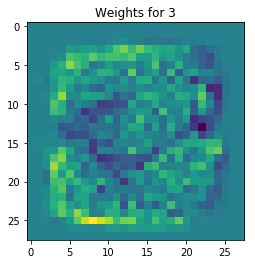

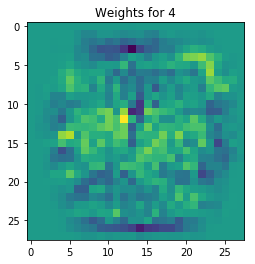

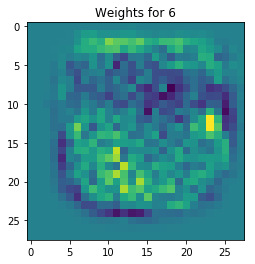

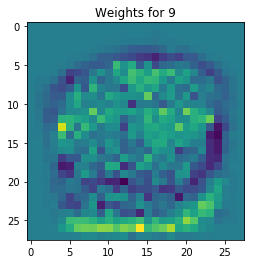

In [34]:
def show_calculated_weigts(k=0):
    weights = classifier.coef_[k].reshape((28, -1))
    plt.title('Weights for %d' % k)
    plt.imshow(weights, cmap=plt.cm.viridis)
    plt.show()

interact(show_calculated_weigts, k = (0, 9));

for i in np.arange(1, 10):
    show_calculated_weigts(i)

### Further investigation

**Fit the logistic regression classifier for different values of the regularization parameter**

**MARKS: 2**

In [11]:
print('training...')
print('power: ')
start = -10
stop = 20

weights = []
classifiers = []
for i in np.linspace(start=start, stop=stop, num=stop-start+1):
    print(int(i), end=',')
    classifier = logis(C=np.power(10, i),
                   solver='lbfgs',
                   multi_class='multinomial')
    classifier.fit(X_train, y_train)
    classifiers.append(classifier)
    weights.append(classifier.coef_.reshape((10, 28, -1)))
    
print('Done!')

training...
power: 
-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,Done!


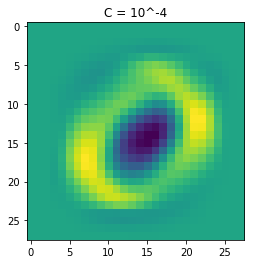

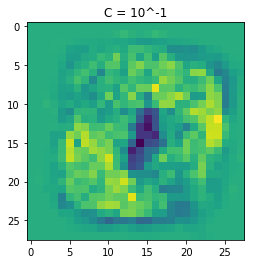

In [12]:
# Regularization coefficient variation
def show_weights_regularization(k=5):
    # retrieve the waits for the zero
    plt.figure()
    plt.title('C = 10^%d' % k)
    plt.imshow(weights[k-start][0], cmap=plt.cm.viridis)
    plt.show()
    
interact(show_weights_regularization, k=(start, stop));

for i in np.arange(-5, 1):
    show_weights_regularization(i)

**Explain the changes in the weight images observed.**<br>

The regularization parameter's purpose is to counteract over fitting. Thus we can see when we pass in a small regularization parameter (this corresponds to a large C value as we pass in the inverse of the regularization parameter) The image is very defined and there are very specific areas which are seen as important (have a stronger weight). This is quite typical of over fitting. On the other hand, we can see that as we make the regularization parameter larger (this corresponds to a small C value) we get more general areas of importance rather than specific pixels.

# Extra Goodies

### Looking at the regularization parameters affect on accuracy

Let's first look at how it affects the accuracy when tested on training data:

In [28]:
accuracy = []
for i in np.arange(stop - start + 1):
    pr_labels_train = classifiers[i].predict(X_train)
    total = np.sum(pr_labels_train == y_train)
    accuracy.append(100*total/X_train.shape[0])

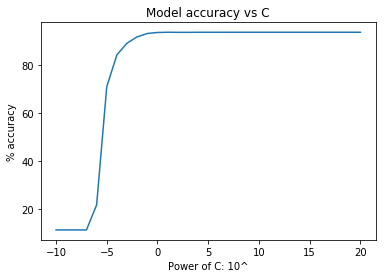

In [27]:
plt.title('Model accuracy vs C')
plt.xlabel('Power of C: 10^')
plt.ylabel('% accuracy')
plt.plot(np.linspace(start=start, stop=stop, num=stop-start+1),
         accuracy);

Interesting. As far as I understood. As your regularization parameter gets very small the accuracy for the training data should get closer and closer to 100%. This is due to the model getting more and more over fitted. I think the reason we level off at 93.54% is: this logistic regression is a linear model, and thus is in a way immune to intense over fitting. The functions can only fit the data so well when it is using a straight line. The real trouble with over fitting comes when you use non-linear functions to model a system because then the decision boundary can curve and snake into all the nook's and cranies and fit the training data perfectly. 

Now let's have a look at affect on accuracy on test data:

In [29]:
accuracy = []
for i in np.arange(stop - start + 1):
    pr_labels_test = classifiers[i].predict(X_test)
    total = np.sum(pr_labels_test == y_test)
    accuracy.append(100*total/X_test.shape[0])

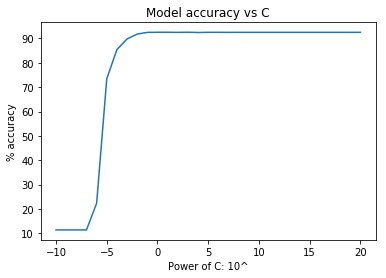

In [30]:
plt.title('Model accuracy vs C')
plt.xlabel('Power of C: 10^')
plt.ylabel('% accuracy')
plt.plot(np.linspace(start=start, stop=stop, num=stop-start+1),
         accuracy);

However slight we can see some of the effects of over fitting. The accuracy increases on the training data but starts to decrease on the test data.

We can see that the best accuracy is found when C = 10^1 and C = 10^3, let's have a look at their weights. Firstly C = 10^1:

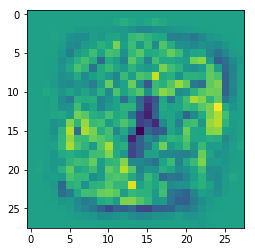

In [15]:
# Regularization coefficient variation
def show_weights_regularization(k=0):
    # retrieve the waits for the zero
    plt.imshow(weights[11][k], cmap=plt.cm.viridis)
    plt.show()
    
interact(show_weights_regularization, k=(0, 9));

And now C = 10^3:

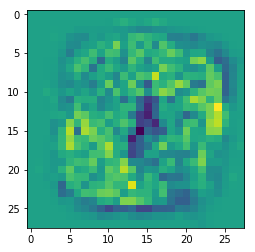

In [16]:
# Regularization coefficient variation
def show_weights_regularization(k=0):
    # retrieve the waits for the zero
    plt.imshow(weights[13][k], cmap=plt.cm.viridis)
    plt.show()
    
interact(show_weights_regularization, k=(0, 9));

We can see that they look very similar. We can also see that there are areas that the model knows are important and areas that aren't. We can see that there are no random pixels that seem to have a irrationally large weight on them and thus we have most likely not over fitted the model.

### Let's do the same thing with tensorflow!

I worked closely from this tutorial:<br>
https://www.tensorflow.org/get_started/mnist/beginners<br>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Accuracy:
0.9175


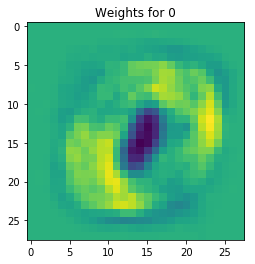

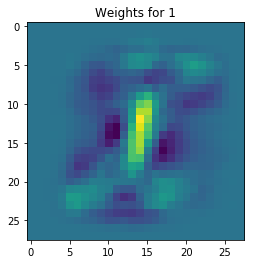

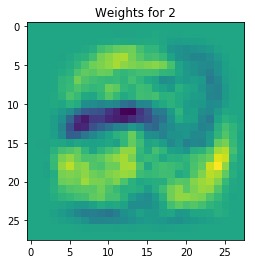

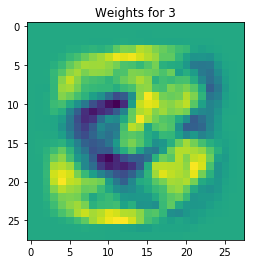

In [39]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Create a place to store our images
x = tf.placeholder(tf.float32, [None, 784])

# Create the weights and biases variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Create the model!
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Create a structure to store our labels
y_ = tf.placeholder(tf.float32, [None, 10])

# Create objective or cost function
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y_ * tf.log(y), 
                   reduction_indices=[1])
)

# Define how to train the model
train_step =\
    tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Create an interactive session
sess = tf.InteractiveSession()

# Initalize defined variables and placeholders
tf.global_variables_initializer().run()

# Train the model
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
# Check if our model can predict values acurately
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

# Find percentage of correct predictions
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Print the accuracy out
print('Accuracy:')
print(sess.run(accuracy, feed_dict={
    x: mnist.test.images,
    y_: mnist.test.labels
}))

# reshape and display the weights
numpy_w = W.eval().T.reshape((10, 28, -1))
for i in np.arange(4):
    plt.title('Weights for %d' % i)
    plt.imshow(numpy_w[i], cmap=plt.cm.viridis)
    plt.show()

We see very similar results, the accuracy is slightly smaller and the weights look very similar as the cases above where C=10^-2. This is not surprising as we are also using a softmax classifier. 

# Plagiarism Declaration

* I have read and understand the Stellenbosch University Policy on Plagiarism and the definitions of plagiarism and self-plagiarism contained in the Policy [Plagiarism: The use of the ideas or material of others without acknowledgement, or the re-use of one’s own previously evaluated or published material without acknowledgement or indication thereof (self-plagiarism or text- recycling)].
* I also understand that direct translations are plagiarism.
* Accordingly all quotations and contributions from any source whatsoever (including the internet) have been cited fully.
* I understand that the reproduction of text without quotation marks (even when the source is cited) is plagiarism.
* I declare that the work contained in this assignment is my own work and that I have not previously (in its entirety or in part) submitted it for grading in this module/assignment or another module/assignment.